In [50]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [51]:
# convert csv to dataframe
df_final=pd.read_csv(r"C:\Users\vinoo\OneDrive\文档\shared files\capstone_project3\final_encoded_data.csv")
df_final

,ownerno,modelyear,price,seats,kms_driven,mileage,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,...,insurance_validity_Comprehensive,insurance_validity_Not Available,insurance_validity_Third Party,insurance_validity_Third Party insurance,insurance_validity_Zero Dep,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,3,2015,4.00,5,120000.0,23.10,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2018,8.11,5,32706.0,17.00,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2018,5.85,5,11949.0,23.84,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2014,4.62,5,17794.0,19.10,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2015,7.90,5,60000.0,23.65,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,1,2018,9.90,9,51122.0,18.49,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7445,4,2010,1.20,5,96094.0,20.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7446,1,2018,6.20,5,42891.0,22.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7447,1,2018,8.90,5,59100.0,19.87,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
# statistical details of the data
df_final.describe()

,ownerno,modelyear,price,seats,kms_driven,mileage,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,...,insurance_validity_Comprehensive,insurance_validity_Not Available,insurance_validity_Third Party,insurance_validity_Third Party insurance,insurance_validity_Zero Dep,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
count,7449.000000,7449.000000,7449.000000,7449.000000,7.449000e+03,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,...,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000
mean,1.366761,2016.393476,6.431018,5.175594,5.967338e+04,19.637716,0.177742,0.167674,0.163109,0.183917,...,0.357900,0.027252,0.081622,0.492818,0.039871,0.012888,0.281917,0.002953,0.001879,0.700362
std,0.643067,3.755657,3.668188,0.621007,4.417458e+04,3.856867,0.382321,0.373601,0.369490,0.387443,...,0.479415,0.162828,0.273806,0.499982,0.195670,0.112797,0.449963,0.054269,0.043315,0.458130
min,0.000000,1985.000000,1.000000,2.000000,1.010000e+02,7.080000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2014.000000,3.800000,5.000000,3.219000e+04,17.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,5.650000,5.000000,5.555600e+04,19.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2019.000000,8.100000,5.000000,8.000000e+04,21.700000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,5.000000,2023.000000,18.250000,10.000000,2.000022e+06,140.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# create x and y datas

x=df_final.drop(columns=["price"],axis=1)
y=df_final["price"]

In [54]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [55]:
import pickle
with open('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [56]:
# # function to choose the best algorithm

# def best_ML_algorithm(x,y,algorithms):
        
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#         results = []

#         for algorithm in algorithms:

#                 model=algorithm().fit(x_train,y_train)
#                 y_pred=model.predict(x_test)
#                 MSE_1=mean_squared_error(y_test,y_pred)
#                 MAE_1=mean_absolute_error(y_test,y_pred)
#                 RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
#                 r_squr_1=r2_score(y_test,y_pred)
#                 results.append({"model": type(model).__name__,
#                                           "MAE": MAE_1,
#                                           "MSE": MSE_1,
#                                           "RMSE": RMSE_1,
#                                            "R2": r_squr_1 })
#                 print(f"Trainscore: {model.score(x_train, y_train)}")
#                 print(f"Testscore: {model.score(x_test, y_test)}")
#                 # Plot Actual vs Predicted Prices
#                 plt.figure(figsize=(10, 6))
#                 sns.scatterplot(x=y_test, y=y_pred)
#                 plt.xlabel('Actual Prices')
#                 plt.ylabel('Predicted Prices')
#                 plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
#                 plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
#                 plt.show()
#         results_df = pd.DataFrame(results)
        
#         return results_df   

In [57]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor


# # using above function try to identify the best algorithm

# algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

# results_df = best_ML_algorithm(x_scaled,y, algorithms)

In [58]:
# # model comparision
# results_df

In [59]:
# # using ridge to fit and evalutes the model
# from sklearn.linear_model import Ridge
# X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
# alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# values=[]
# for i in alpha_values:
#     ridgeModel = Ridge(alpha=i)
#     ridgeModel.fit(X_train,Y_train)
#     y_pred=ridgeModel.predict(X_test)
#     r_squr=r2_score(Y_test,y_pred)
#     values.append(r_squr)

In [60]:
# # best alpha values for prediction
# best_alpha_ridge = alpha_values[np.argmax(values)]
# ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
# ridgeModel_1.fit(X_train, Y_train)
# y_pred_ridge=ridgeModel_1.predict(X_test)


In [61]:
# # model evaluation
# MSE_ridge=mean_squared_error(Y_test,y_pred_ridge)
# MAE_ridge=mean_absolute_error(Y_test,y_pred_ridge)
# RMSE_ridge=np.sqrt(mean_squared_error(Y_test,y_pred_ridge))
# r_squr_ridge=r2_score(Y_test,y_pred_ridge)

In [62]:
# # create dataframe to view above evaluation metrics
# ridge=pd.DataFrame({"model":"RidgeRegressor","MAE":[MSE_ridge],"MSE":[MAE_ridge],"RMSE":[RMSE_ridge],"R2":r_squr_ridge})
# ridge

In [63]:
# # using ridge to fit and evalutes the model
# from sklearn.linear_model import Lasso
# alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# values_L=[]
# for i in alpha_values_L:
#     LassoModel = Lasso(alpha=i)
#     LassoModel.fit(X_train,Y_train)
#     y_pred=LassoModel.predict(X_test)
#     r_squr=r2_score(Y_test,y_pred)
#     values_L.append(r_squr)
# print(values_L)

In [64]:
# # best alpha values for prediction
# best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
# LassoModel_1 = Lasso(alpha=best_alpha_lasso)
# LassoModel_1.fit(X_train, Y_train)
# y_pred_lasso=LassoModel_1.predict(X_test)

In [65]:
# # model evaluation
# MSE_lasso=mean_squared_error(Y_test,y_pred_lasso)
# MAE_lasso=mean_absolute_error(Y_test,y_pred_lasso)
# RMSE_lasso=np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
# r_squr_lasso=r2_score(Y_test,y_pred_lasso)

In [66]:
# # create dataframe to view above evaluation metrics
# lasso=pd.DataFrame({"model":"LassoRegressor","MAE":[MSE_lasso],"MSE":[MAE_lasso],"RMSE":[RMSE_lasso],"R2":r_squr_lasso})
# lasso

In [67]:
# # Find the model with the highest R² score 
# best_model_df = pd.concat([results_df,ridge,lasso], ignore_index=True)
# best_model_df


In [68]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function to choose the best algorithm with evaluation metrics
# def best_ML_algorithm(x, y, algorithms, alpha_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#     results = []

#     for algorithm in algorithms:
#         model = algorithm().fit(x_train, y_train)
#         y_pred = model.predict(x_test)
#         MSE = mean_squared_error(y_test, y_pred)
#         MAE = mean_absolute_error(y_test, y_pred)
#         RMSE = np.sqrt(MSE)
#         r_squr = r2_score(y_test, y_pred)
#         results.append({
#             "model": type(model).__name__,
#             "MAE": MAE,
#             "MSE": MSE,
#             "RMSE": RMSE,
#             "R2": r_squr
#         })
#         print(f"{type(model).__name__} - Train Score: {model.score(x_train, y_train)}, Test Score: {model.score(x_test, y_test)}")
        
#         # Plot Actual vs Predicted Prices
#         plt.figure(figsize=(10, 6))
#         sns.scatterplot(x=y_test, y=y_pred)
#         plt.xlabel('Actual Prices')
#         plt.ylabel('Predicted Prices')
#         plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
#         plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
#         plt.show()

#     # Ridge and Lasso Regression with best alpha selection
#     for name, model_type in zip(["Ridge", "Lasso"], [Ridge, Lasso]):
#         best_r2 = -np.inf
#         best_model = None
#         for alpha in alpha_values:
#             model = model_type(alpha=alpha).fit(x_train, y_train)
#             y_pred = model.predict(x_test)
#             r_squr = r2_score(y_test, y_pred)
#             if r_squr > best_r2:
#                 best_r2 = r_squr
#                 best_model = model

#         # Final evaluation for best Ridge/Lasso model
#         y_pred_best = best_model.predict(x_test)
#         MSE_best = mean_squared_error(y_test, y_pred_best)
#         MAE_best = mean_absolute_error(y_test, y_pred_best)
#         RMSE_best = np.sqrt(MSE_best)
#         results.append({
#             "model": name + "Regressor",
#             "MAE": MAE_best,
#             "MSE": MSE_best,
#             "RMSE": RMSE_best,
#             "R2": best_r2
#         })
#         print(f"{name} - Alpha: {best_model.alpha}, Train Score: {best_model.score(x_train, y_train)}, Test Score: {best_model.score(x_test, y_test)}")

#         # Plot Actual vs Predicted Prices
#         plt.figure(figsize=(10, 6))
#         sns.scatterplot(x=y_test, y=y_pred_best)
#         plt.xlabel('Actual Prices')
#         plt.ylabel('Predicted Prices')
#         plt.title(f'{name} Regressor: Actual vs Predicted Prices')
#         plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
#         plt.show()

#     # Compile all results into a DataFrame
#     results_df = pd.DataFrame(results)
#     return results_df


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to choose the best algorithm
def best_ML_algorithm(x, y, algorithms):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    results = []

    for algorithm in algorithms:
        # Instantiate the model directly if it is Ridge or Lasso with optimized alpha values
        if algorithm == Ridge:
            model = Ridge(alpha=0.001).fit(x_train, y_train)
        elif algorithm == Lasso:
            model = Lasso(alpha=0.001).fit(x_train, y_train)
        else:
            model = algorithm().fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        MSE = mean_squared_error(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "model": type(model).__name__,
            "MAE": MAE,
            "MSE": MSE,
            "RMSE": RMSE,
            "R2": r2
        })
        
        print(f"{type(model).__name__} - Train score: {model.score(x_train, y_train):.4f}, Test score: {model.score(x_test, y_test):.4f}")
        
        # Plot Actual vs Predicted Prices
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
        plt.show()

    results_df = pd.DataFrame(results)
    return results_df


LinearRegression - Train score: 0.8869, Test score: -401956989507889425165582336.0000


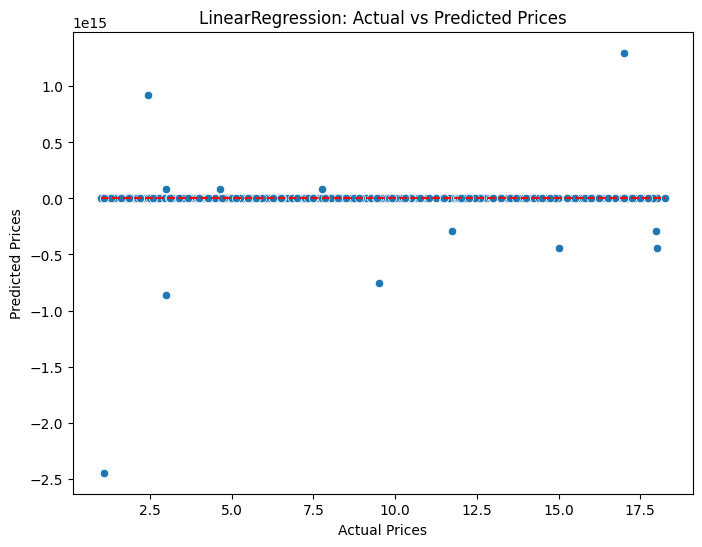

Ridge - Train score: 0.8943, Test score: 0.8657


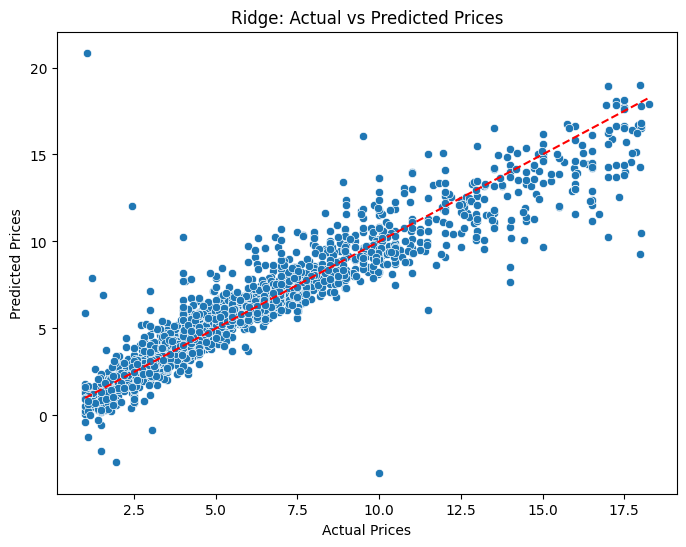

Lasso - Train score: 0.8942, Test score: 0.8600


c:\Users\vinoo\OneDrive\文档\shared files\capstone_project3\car_dekho\StatsM\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.850e+00, tolerance: 7.428e+00
  model = cd_fast.enet_coordinate_descent(


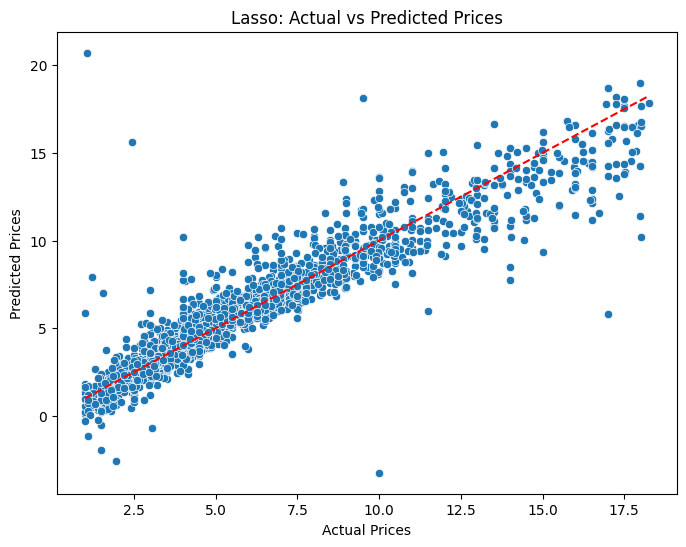

DecisionTreeRegressor - Train score: 0.9996, Test score: 0.8021


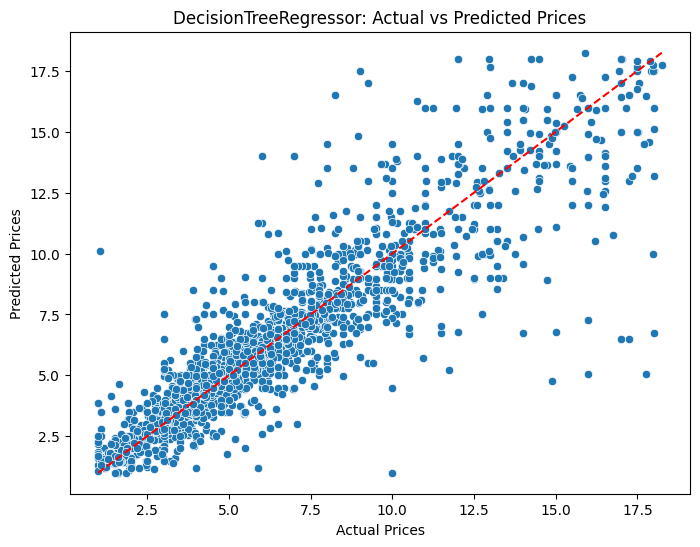

RandomForestRegressor - Train score: 0.9812, Test score: 0.8701


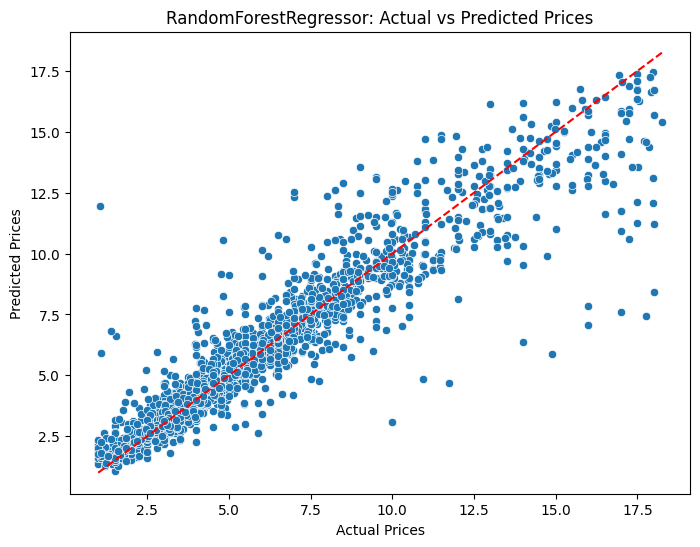

GradientBoostingRegressor - Train score: 0.8350, Test score: 0.8050


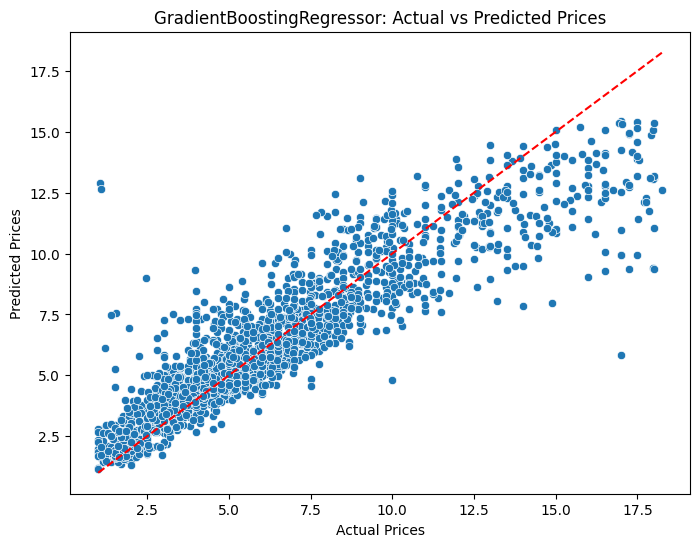

,model,MAE,MSE,RMSE,R2
0,LinearRegression,4.306378e+12,5.595257e+27,7.480145e+13,-4.019570e+26
1,Ridge,8.583364e-01,1.869339e+00,1.367238e+00,8.657088e-01
2,Lasso,8.602200e-01,1.949089e+00,1.396098e+00,8.599796e-01
3,DecisionTreeRegressor,1.014733e+00,2.754188e+00,1.659575e+00,8.021422e-01
4,RandomForestRegressor,8.037928e-01,1.808130e+00,1.344667e+00,8.701060e-01
5,GradientBoostingRegressor,1.125429e+00,2.713768e+00,1.647352e+00,8.050460e-01


In [69]:
# Import necessary algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the algorithms list with Ridge and Lasso included
algorithms = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor]

# Calling the function to evaluate all models, including Ridge and Lasso
results_df = best_ML_algorithm(x_scaled, y, algorithms)
results_df


In [70]:
best_model_df = results_df

In [71]:
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]
print("Best model with high r2 score")
best_model

Best model with high r2 score


model    RandomForestRegressor
MAE                   0.803793
MSE                    1.80813
RMSE                  1.344667
R2                    0.870106
Name: 4, dtype: object

In [72]:
#convert dataframe to csv
path=r"C:\Users\vinoo\OneDrive\文档\shared files\capstone_project3\car_pp_model.csv"
best_model_df.to_csv(path,index=False)

### Hyperparameter tuning for the best model-Random forest

In [73]:
# parameters for model
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}




In [74]:
# tuning the model using grid search cv
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
grid_tuning=RandomizedSearchCV(estimator=RandomForestRegressor(),
                            param_distributions=param_grid, cv=5, n_jobs=-1)

grid_tuning.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [75]:
grid_tuning.best_params_,grid_tuning.best_score_

({'n_estimators': 150,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 np.float64(0.8575121845280951))

In [76]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=200,max_features=None,max_depth=20,min_samples_leaf=4,
                                  min_samples_split=5,random_state=42)

final_model.fit(X_train,Y_train)

#Model evaluation
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.9240709288530096
Testscore: 0.8352642212641103


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.914115,2.293129,1.514308,0.835264


###  store the model using pickle


In [77]:
import pickle
# store the model using pickle

with open('Randomforest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [78]:
# load the model,scaler and encoder
with open('Randomforest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

## model system buliding-Pipeline

In [79]:
#read final csv file
df_1=pd.read_csv(r"C:\Users\vinoo\OneDrive\文档\shared files\capstone_project3\final_df.csv")
df_1

,city,body_type,transmission,ownerno,brand,model,modelyear,price,insurance_validity,fuel_type,seats,kms_driven,mileage
0,Bangalore,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,Petrol,5,120000.0,23.10
1,Bangalore,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,Petrol,5,32706.0,17.00
2,Bangalore,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,Petrol,5,11949.0,23.84
3,Bangalore,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,Petrol,5,17794.0,19.10
4,Bangalore,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,Diesel,5,60000.0,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Chennai,Hatchback,Automatic,1,Maruti,Maruti Swift,2018,6.20,Third Party insurance,Petrol,5,42891.0,22.00
8365,Chennai,SUV,Manual,1,Renault,Renault Duster,2018,8.90,Third Party insurance,Diesel,5,59100.0,19.87
8366,Chennai,SUV,Automatic,1,Tata,Tata Nexon,2018,8.01,Not Available,Petrol,5,55913.0,17.00
8367,Chennai,SUV,Automatic,1,Volkswagen,Volkswagen Tiguan,2017,20.50,Comprehensive,Diesel,5,65000.0,16.65


In [80]:
# x and y data splitting
x_df=df_1.drop(columns=["price"],axis=1)
y_df=df_1["price"]

In [81]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [82]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

catg_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])



In [83]:
# compose preprocessing techniques
preprocessor=ColumnTransformer([("numerical",num_preprocessor,num),
                                ("categorical",catg_preprocessor,cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerno', 'modelyear', 'seats', 'kms_driven',
                                  'mileage']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['city', 'body_type', 'transmission', 'brand',
                                  'model', 'insurance_validity',
                                  'fuel_type'])])

In [84]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerno', 'modelyear',
                                                   'seats', 'kms_driven',
                                                   'mileage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['city', 'body_type',
                                                   'transmission', 'brand',
                                                   'model',
                                                   'insurance_validity',
                                                   'fuel_type'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [85]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerno', 'modelyear',
                                                   'seats', 'kms_driven',
                                                   'mileage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['city', 'body_type',
                                                   'transmission', 'brand',
                                                   'model',
                                                   'insurance_validity',
                                                   'fuel_type'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [86]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_squr_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_squr_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,2.765719,61.250363,7.826261,0.637578


In [87]:
x_df.columns

Index(['city', 'body_type', 'transmission', 'ownerno', 'brand', 'model',
       'modelyear', 'insurance_validity', 'fuel_type', 'seats', 'kms_driven',
       'mileage'],
      dtype='object')

In [88]:
x_df["brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [89]:
df_1[df_1["price"]>45]

,city,body_type,transmission,ownerno,brand,model,modelyear,price,insurance_validity,fuel_type,seats,kms_driven,mileage
16,Bangalore,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,55.95,Comprehensive,Diesel,5,16000.0,18.90
24,Bangalore,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz S-Class,2016,49.00,Third Party insurance,Petrol,5,50000.0,7.81
38,Bangalore,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,Petrol,5,18157.0,15.56
52,Bangalore,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,79.90,Third Party,Diesel,5,400.0,18.90
93,Bangalore,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz E-Class,2018,59.90,Comprehensive,Diesel,5,24000.0,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,Chennai,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz AMG A 35,2022,59.00,Comprehensive,Petrol,5,300.0,18.90
8275,Chennai,Sedan,Automatic,1,BMW,BMW 5 Series,2021,60.00,Comprehensive,Diesel,5,20000.0,20.37
8289,Chennai,Sedan,Automatic,1,Lexus,Lexus ES,2018,50.00,Comprehensive,Petrol,5,37000.0,22.37
8319,Chennai,Sedan,Automatic,1,BMW,BMW 3 Series,2022,60.00,Comprehensive,Petrol,5,6000.0,16.13


In [90]:
df_1.loc[24]

city                              Bangalore
body_type                             Sedan
transmission                      Automatic
ownerno                                   2
brand                         Mercedes-Benz
model                 Mercedes-Benz S-Class
modelyear                              2016
price                                  49.0
insurance_validity    Third Party insurance
fuel_type                            Petrol
seats                                     5
kms_driven                          50000.0
mileage                                7.81
Name: 24, dtype: object

In [91]:
x_df[x_df["brand"]=="BMW"]

,city,body_type,transmission,ownerno,brand,model,modelyear,insurance_validity,fuel_type,seats,kms_driven,mileage
20,Bangalore,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,Diesel,5,100000.0,18.48
38,Bangalore,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,Petrol,5,18157.0,15.56
72,Bangalore,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,Diesel,5,40525.0,21.76
88,Bangalore,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,Diesel,5,92000.0,16.55
117,Bangalore,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,Diesel,5,80000.0,13.20
...,...,...,...,...,...,...,...,...,...,...,...,...
8275,Chennai,Sedan,Automatic,1,BMW,BMW 5 Series,2021,Comprehensive,Diesel,5,20000.0,20.37
8305,Chennai,SUV,Automatic,1,BMW,BMW X1,2019,Comprehensive,Diesel,5,65000.0,20.68
8319,Chennai,Sedan,Automatic,1,BMW,BMW 3 Series,2022,Comprehensive,Petrol,5,6000.0,16.13
8340,Chennai,Sedan,Automatic,1,BMW,BMW 3 Series Gran Limousine,2022,Comprehensive,Diesel,5,15000.0,19.62


In [92]:
df_1.iloc[20]

city                              Bangalore
body_type                             Sedan
transmission                      Automatic
ownerno                                   3
brand                                   BMW
model                          BMW 5 Series
modelyear                              2011
price                                  22.0
insurance_validity    Third Party insurance
fuel_type                            Diesel
seats                                     5
kms_driven                         100000.0
mileage                               18.48
Name: 20, dtype: object

In [93]:
#convert dataframe to csv
path=r"C:\Users\vinoo\OneDrive\文档\shared files\capstone_project3\data_to_streamlit.csv"
df_1.to_csv(path,index=False)

## Model prediction

In [94]:
# New data to predict car price
new_df=pd.DataFrame({
    'fuel_type':'Disel',
    'body_type':'Sedan',
    'transmission':'Automatic',
    'ownerno':3,
    'brand':'BMW',
    'model':'BMW 5 Series',
    'modelyear':2011,
    'insurance_validity': 'Third Party insurance',
    'kms_driven':100000.0,
    'mileage':18,
    'seats':5,
    'city':'hyderabad'
},index=[0])
new_df

,fuel_type,body_type,transmission,ownerno,brand,model,modelyear,insurance_validity,kms_driven,mileage,seats,city
0,Disel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000.0,18,5,hyderabad


In [95]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")


The price of the BMW car is: 13.86 lakhs


In [96]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)

In [97]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\vinoo\Downloads
